# Практическая работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 0381 Михайлов Виктор и Прохоров Борис. Вариант №8.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

Принцип работы нерекурсивного цифрового фильтра:

$$ y_k = \sum_{n = -N}^N{}h_nS(k-n)$$

где S - входное воздействие, y – результат фильтрации, h – коэффициенты
фильтра.

Нерекурсивные фильтры требуют большего числа вычислений, однако при определенных условиях они позволяют получить линейную фазовую характеристику цифрового фильтра и обеспечивают устойчивость работы.

Чтобы обеспечить хорошее подавление ошибок без искажения сигнала
необходимо чтобы АЧХ фильтра обладала следующими параметрами:
- гладкая и близкая к 1 в полосе пропускания (сигнал не должен
искажаться);
- должна иметь маленькую переходную зону (область между полосой
пропускания и полосой подавления);
- гладкая и близкая к 0 в полосе подавления.

Чтобы добиться высоких характеристик, необходимо использовать фильтр с
большим количеством элементов. Для цифровых фильтров это порядок фильтра – количество элементов задержки. При использовании меньшего числа элементов в АЧХ появляются искажения. Так, усечение числа элементов при разложении в частотный ряд ведет к искажениям во временной области, а усечения во временной области приводят к искажениям в частотной – это явление называется явлением Гиббса.
- крутизна перепадов "размывается", т.к. она не может быть больше, чем крутизна последней сохраненной гармоники ряда;
- по обе стороны "размытых" перепадов появляются выбросы и затухающие колебания с частотой, близкой к частоте первого отброшенного члена ряда.

Чтобы уменьшить искажения необходимо скорректировать коэффициенты фильтра. Для этого используют весовые функции. Весовая функция уменьшает вклад коэффициентов более высокого порядка.

Основной принцип оконного метода проектирования состоит в обрезании
идеальной импульсной характеристики одним из окон конечной длины.

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

### Импорт необходимых библиотек:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

###1. Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построим графики $\tilde{H}(f)$. Проинтерпретируем частотные свойства передаточных функций для различного количества точек.

Входной сигнал: $𝑠(𝑡)$

Выходной сигнал: $𝑦(𝑡) = 𝐴 + 𝐵t$


Если осуществлять приближение по МНК прямой линией по 𝑚 точкам, то необходимо минимизировать следующее выражение для нечетных чисел:
$𝐹(𝐴,𝐵) = \sum^{m}_{k=-m} (𝑠𝑘 − 𝐴 − 𝐵𝑘)^2 ⇒ 𝑚𝑖n$

Дифференцируем выражение по аргументам A, B и, приравнивая полученные уравнения нулю, формируем 2 нормальных уравнения:

####$\begin{cases}A=\frac{1}{(2m+1)}\sum^{m}_{k=-m} 𝑠_𝑘\\B=\frac{\sum^{m}_{k=-m}s_k}{\sum^{m}_{k=-m}k^2}\end{cases}$

Тогда:

$y_n=\frac{1}{(2m+1)}s_{n-m}+s_{n-m+1}+...+s_{n+m-1}+s_{n+m}$

Пусть $s_n=e^{iωn}$

$y_n=\frac{1}{(2m+1)}e^{-mi\omega}+e^{-(m-1)i\omega}+ ... + 1 + ... + e^{(m-1)i\omega} + e^{mi\omega} = H(\omega)e^{in\omega}$

$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)+...+2cos(m\omega)}{2m+1}$

####$H(\omega)=\frac{sin(\frac{(2m+1)\omega}{2}}{(2m+1)sin(\frac{\omega}{2})}$

$H(\omega)=H(2𝝅f)=\tilde{H}(f)$

Формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7, 9 точкам:

####$H_3(f)=\frac{sin(3𝝅f)}{3sin(𝝅f)}$

####$H_5(f)=\frac{sin(5𝝅f)}{5sin(𝝅f)}$

####$H_7(f)=\frac{sin(7𝝅f)}{7sin(𝝅f)}$

####$H_9(f)=\frac{sin(9𝝅f)}{9sin(𝝅f)}$


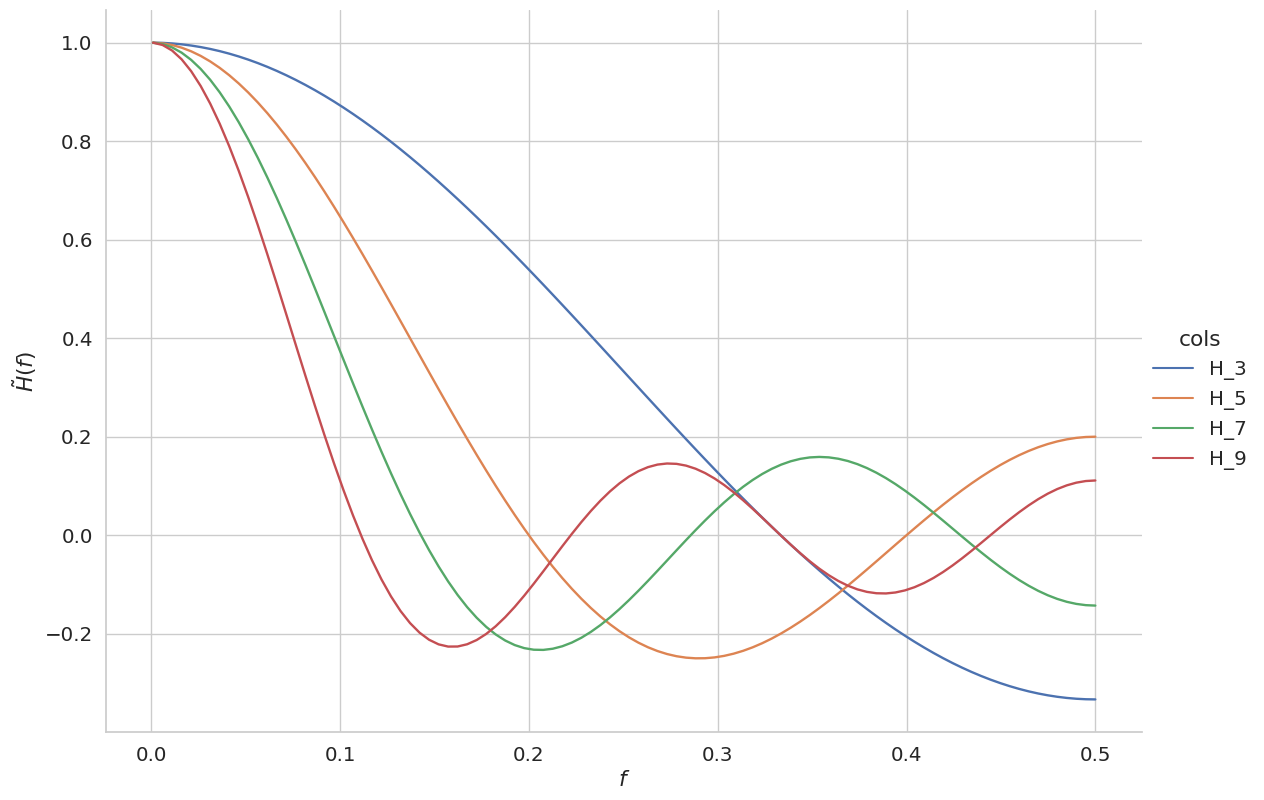

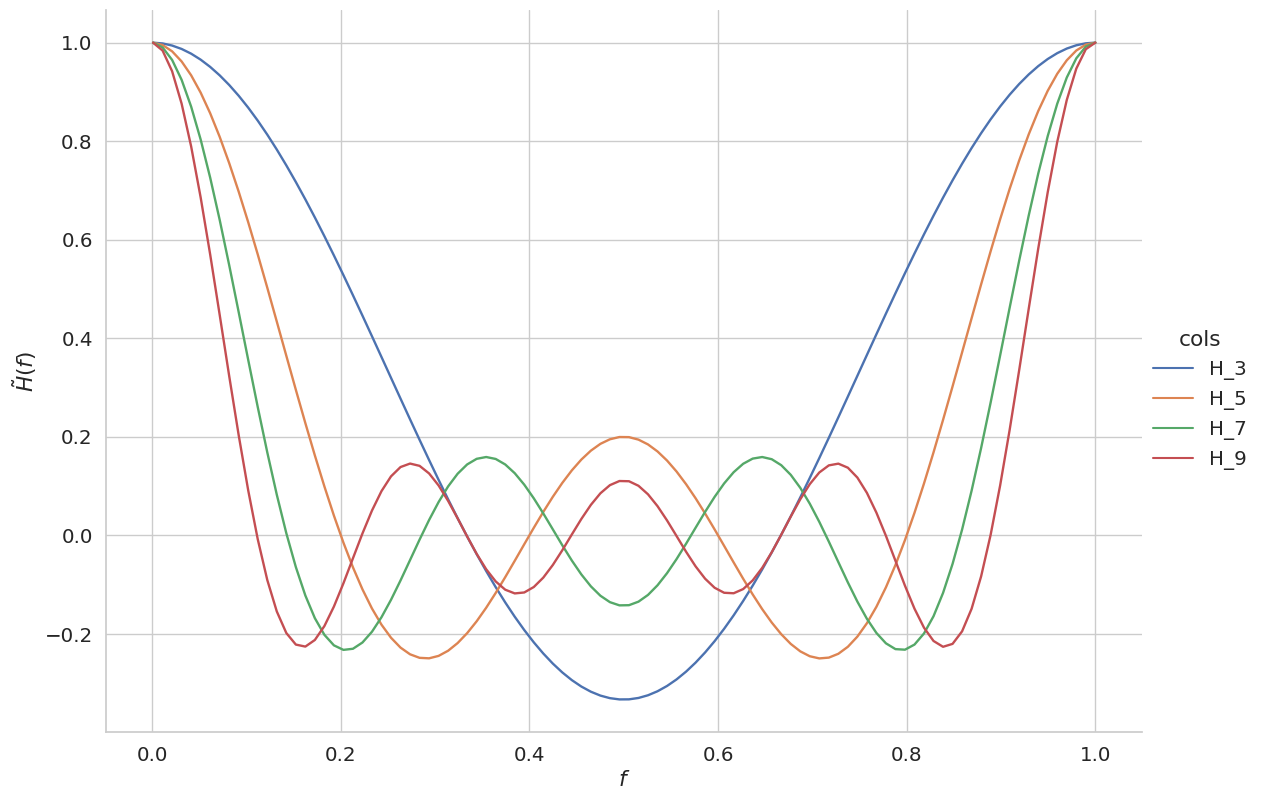

In [ ]:
H_3 = lambda f: (np.sin(3*math.pi*f))/(3*np.sin(math.pi*f))
H_5 = lambda f: (np.sin(5*math.pi*f))/(5*np.sin(math.pi*f))
H_7 = lambda f: (np.sin(7*math.pi*f))/(7*np.sin(math.pi*f))
H_9 = lambda f: (np.sin(9*math.pi*f))/(9*np.sin(math.pi*f))
t = np.linspace(0.001, 0.5, 100)

df = pd.DataFrame({'t': t, 'H_3': H_3(t), 'H_5': H_5(t), 'H_7': H_7(t), 'H_9': H_9(t)})
df_log = pd.DataFrame({'t': t, 'H_3': 20*np.log10(np.abs(H_3(t))), 'H_5': 20*np.log10(np.abs(H_5(t))),
                       'H_7': 20*np.log10(np.abs(H_7(t))), 'H_9': 20*np.log10(np.abs(H_9(t)))})


df2 = df.melt(id_vars='t', var_name='cols', value_name='vals')
df2_log1 = df_log.melt(id_vars='t', var_name='cols', value_name='vals')
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df2, x='t', y='vals', hue='cols', linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels(r'$f$', r'$\tilde H(f)$')
plt.show()

t = np.linspace(0.001, 1, 100)
df = pd.DataFrame({'t': t, 'H_3': H_3(t), 'H_5': H_5(t), 'H_7': H_7(t), 'H_9': H_9(t)})
df2 = df.melt(id_vars='t', var_name='cols', value_name='vals')
ax = sns.relplot(data=df2, x='t', y='vals', hue='cols', linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels(r'$f$', r'$\tilde H(f)$')
plt.show()


На временном интервале равным одному периоду передаточная функция имеет количество экстремумов равное количеству точек, которое использовалось для построения этой функции. И следовательно, с ростом кол-ва точек растёт скорость убывания передаточной функции.

### 2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.


Входной сигнал: $𝑠(𝑡)$

Выходной сигнал: $𝑦(𝑡) = 𝐴 + 𝐵t + Ct^2$


Если осуществлять приближение по МНК, то необходимо минимизировать следующее выражение:
$𝐹(𝐴,𝐵,C) = \sum^{m}_{k=-m} (𝑠𝑘 − 𝐴 − 𝐵𝑘-Ck^2)^2 ⇒ 𝑚𝑖n$

Дифференцируем выражение по аргументам A, C и, приравнивая полученные уравнения к нулю. Получим:

####$\begin{cases}
(2m+1)A + \frac{m(m+1)(2m+1)}{3}C=\sum^{m}_{k=-m} 𝑠_𝑘
\\
\frac{m(m+1)(2m+1)}{3}A + \frac{m(m+1)(2m+1)(3m^2+3m-1)}{15}C=\sum^{m}_{k=-m} k^2 𝑠_𝑘
\end{cases}$

Тогда:
$
A = \frac{\sum^{m}_{k=-m} k^2 𝑠_𝑘 - \frac{3m^2+3m-1}{5}\sum^{m}_{k=-m} 𝑠_𝑘}{\frac{m(m+1)(2m+1)}{3} - \frac{(3m^2+3m-1)(2m + 1)}{5}}
$

$y_n=A=\frac{1}{21}(-2s_{n-3}+3s_{n-2}+6s_{n-1}+7s_{n}+6s_{n+1}+3s_{n+2}+2s_{n+3})$

Пусть $s_n=e^{iωn}$

$y_n=\frac{1}{21}(-2e^{-3iωn}+3e^{-2iωn}+6e^{-iωn}+7+6e^{iωn}+3e^{2iωn}+2e^{3iωn})e^{iωn} = H(\omega)e^{iωn}$

$H(\omega)=\frac{1}{21}(-2e^{-3iωn}+3e^{-2iωn}+6e^{-iωn}+7+6e^{iωn}+3e^{2iωn}+2e^{3iωn})$

$H(\omega)=\frac{1}{21}(7 + 12cosω + 6cos2ω -4cos3ω)$

$H(\omega)=H(2𝝅f)=\tilde{H}(f)$

Формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 7, 9, 11, 13 точкам:

$H_7(f)=\frac{1}{21}(7 + 12cos(2𝝅f) + 6cos(4𝝅f) -4cos(6𝝅f))$

$H_9(f)=\frac{1}{231}(59 + 108cos(2𝝅f) + 78cos(4𝝅f) + 28cos(6𝝅f) - 42cos(8𝝅f))$

$H_{11}(f)=\frac{1}{429}(89 + 168cos(2𝝅f) + 138cos(4𝝅f) + 88cos(6𝝅f) + 18cos(8𝝅f) - 88cos(10𝝅f))$

$H_{13}(f)=\frac{1}{143}(25 + 48cos(2𝝅f) + 42cos(4𝝅f) + 32cos(6𝝅f) + 18cos(8𝝅f) - 22cos(10𝝅f))$


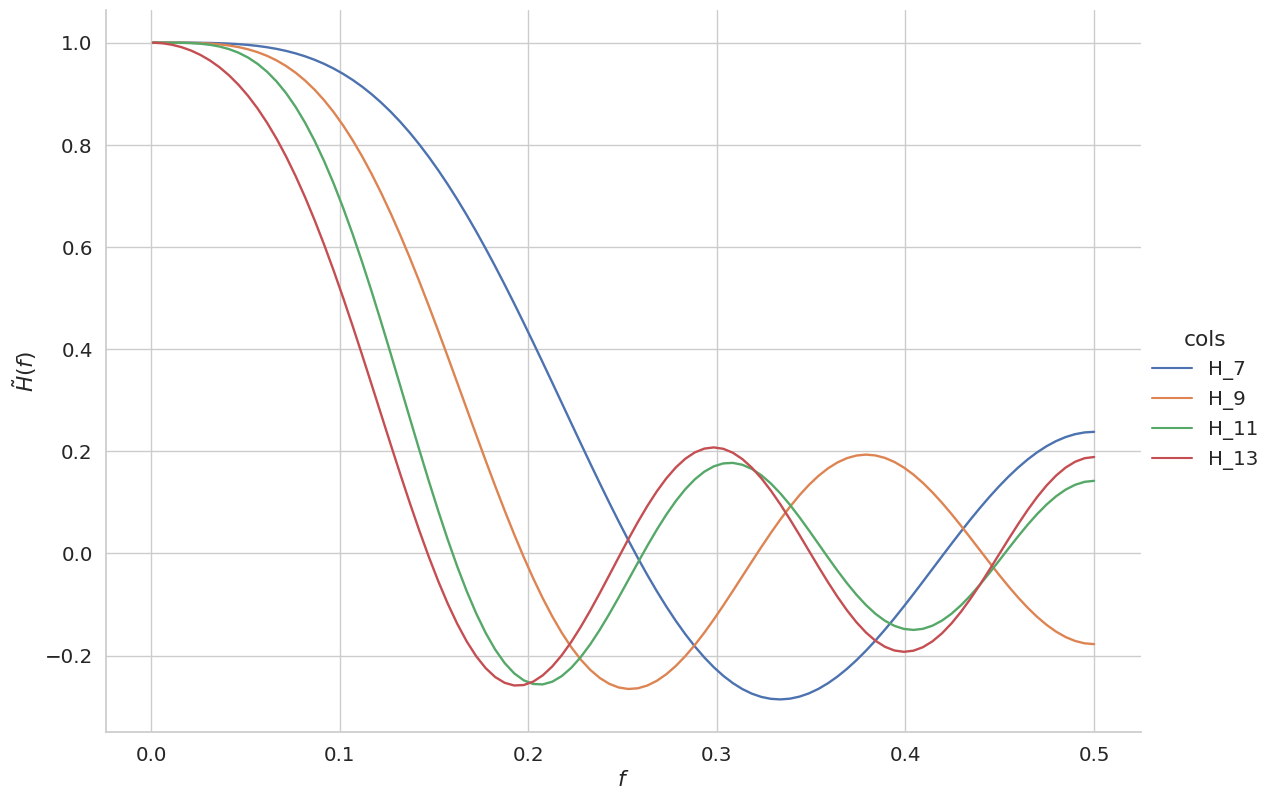

In [ ]:
H_7 = lambda f: 1/21 * (7 + 12*np.cos(2*math.pi*f) + 6*np.cos(4*math.pi*f) - 4*np.cos(6*math.pi*f))
H_9 = lambda f: 1/231 * (59 + 108*np.cos(2*math.pi*f) + 78*np.cos(4*math.pi*f) + 28*np.cos(6*math.pi*f) - 42*np.cos(8*math.pi*f))
H_11 = lambda f: 1/429 * (89 + 168*np.cos(2*math.pi*f) + 138*np.cos(4*math.pi*f) + 88*np.cos(6*math.pi*f) + 18*np.cos(8*math.pi*f) - 72*np.cos(10*math.pi*f))
H_13 = lambda f: 1/143 * (25 + 48*np.cos(2*math.pi*f) + 42*np.cos(4*math.pi*f) + 32*np.cos(6*math.pi*f) + 18*np.cos(8*math.pi*f) - 22*np.cos(10*math.pi*f))
t = np.linspace(0.001, 0.5, 100)


df = pd.DataFrame({'t': t, 'H_7': H_7(t), 'H_9': H_9(t), 'H_11': H_11(t), 'H_13': H_13(t)})
df_log = pd.DataFrame({'t': t, 'H_7': 20*np.log10(np.abs(H_7(t))), 'H_9': 20*np.log10(np.abs(H_9(t))),
                       'H_11': 20*np.log10(np.abs(H_11(t))), 'H_13': 20*np.log10(np.abs(H_13(t)))})


df2 = df.melt(id_vars='t', var_name='cols', value_name='vals')
df2_log2 = df_log.melt(id_vars='t', var_name='cols', value_name='vals')
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df2, x='t', y='vals', hue='cols', linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels(r'$f$', r'$\tilde H(f)$')
plt.show()


###3. Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 9, 11, 13 и 15 точкам. Построим графики $\tilde{H}(f)$. Проинтерпретируем частотные свойства передаточных функций для различного количества точек.

Входной сигнал: $𝑠(𝑡)$

Выходной сигнал: $𝑦(𝑡) = 𝐴 + 𝐵t + Ct^2 + Dt^3 + Et^4$


Найдём коэффициенты по МНК:
$𝐹(𝐴,𝐵) = \sum^{m}_{k=-m} (𝑠𝑘 − (𝐴 + 𝐵t + Ct^2 + Dt^3 + Et^4))^2 ⇒ 𝑚𝑖n$

Дифференцируем и приравниваем к нулю. Получим:

$A = \frac{3((75m^4+150m^3-175m^2-250m+60)\sum\limits_{k=-m}^{m}s_k-175(2m^2+2m-3) \sum\limits_{k=-m}^{m}k^2s_k+315 \sum\limits_{k=-m}^{m}k^4s_k)}{4(2m+1)(2m-1)(2m+3)(2m-3)(2x+5)}$

Тогда:

$y_n=\frac{3((75m^4+150m^3-175m^2-250m+60)\sum\limits_{k=-m}^{m}s_k-175(2m^2+2m-3) \sum\limits_{k=-m}^{m}k^2s_k+315 \sum\limits_{k=-m}^{m}k^4s_k)}{4(2m+1)(2m-1)(2m+3)(2m-3)(2x+5)}$

Пусть $s_n=e^{iωn}$

$y_n= \frac{3((75m^4+150m^3-175m^2-250m+60)(e^{-mi\omega}+...+e^{mi\omega})-175(2m^2+2m-3)((e^{-i\omega}+e^{i\omega})+4(e^{-2i\omega}+e^{2i\omega})+...+m^2(e^{-mi\omega}+e^{mi\omega}))+315((e^{-i\omega}+e^{i\omega})+16(e^{-2i\omega}+e^{2i\omega})+...+m^4(e^{-mi\omega}+e^{mi\omega})))}{4(2m+1)(2m-1)(2m+3)(2m-3)(2x+5)}e^{ni\omega}$

$y_n=\frac{3((75m^4+150m^3-175m^2-250m+60)(1+...+2cos(m\omega))-175(2m^2+2m-3)(2cos(\omega)+...+2m^2cos(m\omega))+315(2cos(\omega)+...+2m^4cos(m\omega)))}{4(2m+1)(2m-1)(2m+3)(2m-3)(2x+5)}e^{ni\omega}=H(\omega)e^{ni\omega}$

$H(\omega)=\frac{3((75m^4+150m^3-175m^2-250m+60)(1+...+2cos(m\omega))-175(2m^2+2m-3)(2cos(\omega)+...+2m^2cos(m\omega))+315(2cos(\omega)+...+2m^4cos(m\omega)))}{4(2m+1)(2m-1)(2m+3)(2m-3)(2x+5)}$

$H(\omega)=H(2𝝅f)=\tilde{H}(f)$

Формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 9, 11, 13, 15 точкам:

$H_9(f)=\frac{1}{429}(179+270cos(2𝝅f)+60cos(4𝝅f)-110cos(6𝝅f)+30cos(8𝝅f)$

$H_{11}(f)=\frac{1}{429}(143+240cos(2𝝅f)+120cos(4𝝅f)-20cos(6𝝅f)-90cos(8𝝅f)+36cos(10𝝅f)$

$H_{13}(f)=\frac{1}{2431}(677+1200cos(2𝝅f)+780cos(4𝝅f)+220cos(6𝝅f)-270cos(8𝝅f)-396cos(10𝝅f)+220cos(12𝝅f)$

$H_{15}(f)=\frac{1}{46189}(11063+20250cos(2𝝅f)+15000cos(4𝝅f)+7510cos(6𝝅f)-330cos(8𝝅f)-5874cos(10𝝅f)+5720cos(12𝝅f)+4290cos(14𝝅f)$


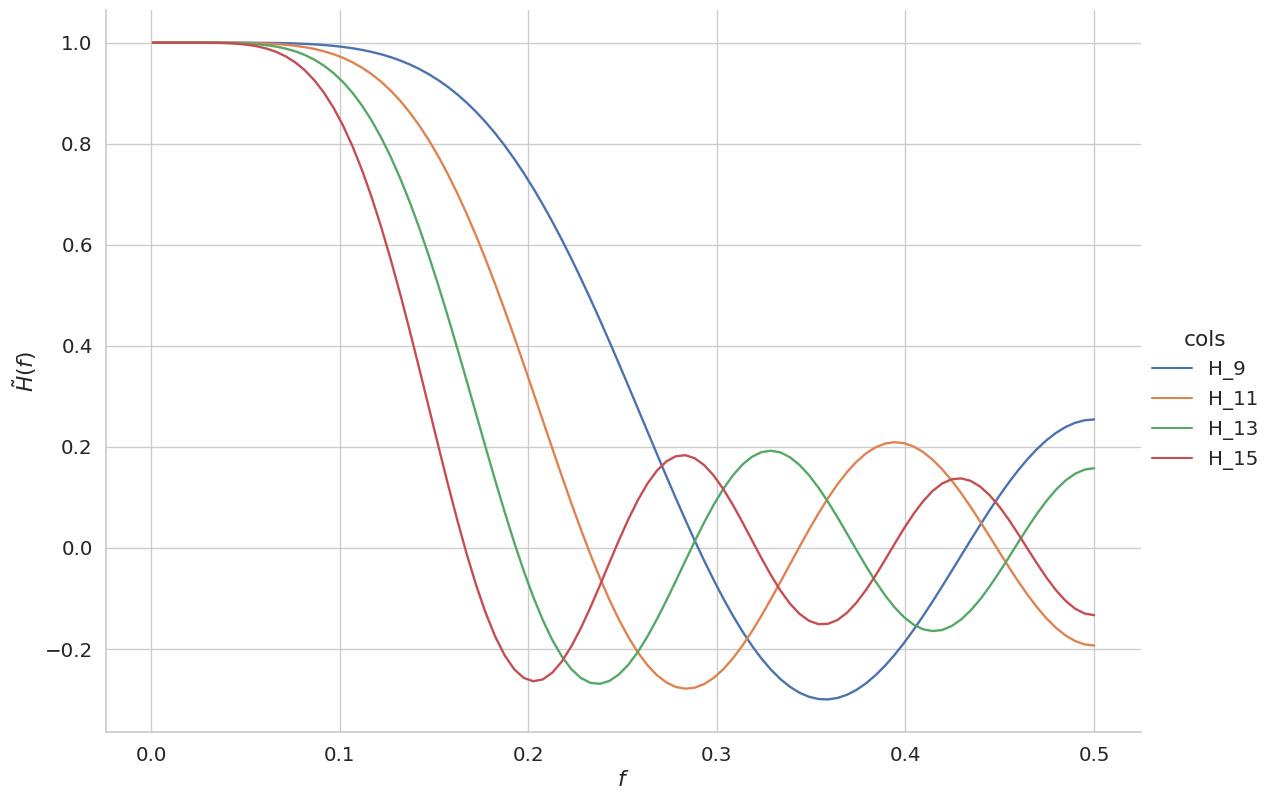

In [ ]:
H_9 = lambda f: 1 / 429 * (179 + 270*np.cos(2*math.pi*f) + 60*np.cos(4*math.pi*f) - 110*np.cos(6*math.pi*f) + 30*np.cos(8*math.pi*f))
H_11 = lambda f: 1 / 429 * (143 + 240*np.cos(2*math.pi*f) + 120*np.cos(4*math.pi*f) - 20*np.cos(6*math.pi*f) - 90*np.cos(8*math.pi*f) + 36*np.cos(10*math.pi*f))
H_13 = lambda f: 1 / 2431 * (677 + 1200*np.cos(2*math.pi*f) + 780*np.cos(4*math.pi*f) + 220*np.cos(6*math.pi*f) - 270*np.cos(8*math.pi*f) - 396*np.cos(10*math.pi*f) + 220*np.cos(12*math.pi*f))
H_15 = lambda f: 1 / 46189 * (11063 + 20250*np.cos(2*math.pi*f) + 15000*np.cos(4*math.pi*f) + 7510*np.cos(6*math.pi*f) - 330*np.cos(8*math.pi*f) - 5874*np.cos(10*math.pi*f) - 5720*np.cos(12*math.pi*f) + 4290*np.cos(14*math.pi*f))
t = np.linspace(0.001, 0.5, 100)


df = pd.DataFrame({'t': t, 'H_9': H_9(t), 'H_11': H_11(t), 'H_13': H_13(t), 'H_15': H_15(t)})
df_log = pd.DataFrame({'t': t, 'H_9': 20*np.log10(np.abs(H_9(t))), 'H_11': 20*np.log10(np.abs(H_11(t))),
                       'H_13': 20*np.log10(np.abs(H_13(t))), 'H_15': 20*np.log10(np.abs(H_15(t)))})


df2 = df.melt(id_vars='t', var_name='cols', value_name='vals')
df2_log3 = df_log.melt(id_vars='t', var_name='cols', value_name='vals')
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df2, x='t', y='vals', hue='cols', linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels(r'$f$', r'$\tilde H(f)$')
plt.show()


###4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал: $𝑠(𝑡)$

Произведём сглаживание по формулам Спенсера:
$y_n = \frac{1}{320}(-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} - 67s_{n-1} + 74s_n + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})$

$y_n = \frac{1}{350}(-s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_n + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} -5s_{n+8} -3s_{n+9} - s_{n+10})$

Пусть $s_n=e^{iωn}$

$y_n = \frac{1}{320}(-3e^{-7i\omega} - 6e^{-6i\omega} - 5e^{-5i\omega} + 3e^{-4i\omega} + 21e^{-3i\omega} + 46e^{-2i\omega} - 67e^{-i\omega} + 74 + 67e^{i\omega} + 46e^{2i\omega} + 21e^{3i\omega} + 3e^{4i\omega} - 5e^{5i\omega} - 6e^{6i\omega} - 3e^{7i\omega})e^{i\omega n}=H(\omega)e^{i\omega n}$

$y_n = \frac{1}{350}(-e^{-10i\omega} - 6e^{-9i\omega} - 5e^{-8i\omega} - 5e^{-7i\omega} - 2e^{-6i\omega} + 6e^{-5i\omega} + 18e^{-4i\omega} + 33e^{-3i\omega} + 47e^{-2i\omega} + 57e^{-i\omega} + 60 + 57e^{i\omega} + 47e^{2i\omega} + 33e^{3i\omega} + 18e^{4i\omega} + 6e^{5i\omega} - 2e^{6i\omega} - 5e^{7i\omega} -5e^{8i\omega} -3e^{9i\omega} - e^{10i\omega})e^{i\omega n}=H(\omega)e^{i\omega n}$

$H_{15}(\omega) = \frac{1}{320}(-6cos(7\omega) - 12cos(6\omega) - 10cos(5\omega) + 6cos(4\omega) + 42cos(3\omega) + 92cos(2\omega) + 134cos(\omega)+ 74)$

$H_{21}(\omega) = \frac{1}{350}(-2cos(10\omega) - 6cos(9\omega) - 10cos(8\omega) - 10cos(7\omega) - 4cos(6\omega) + 12cos(5\omega) + 36cos(4\omega) + 66cos(3\omega) + 94cos(2\omega) + 114cos(\omega) + 60)$

$H(\omega)=H(2𝝅f)=\tilde{H}(f)$

Формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по 15, 21 точкам:

$H_{15}(f) = \frac{1}{320}(74 + 134cos(2πf) + 92cos(4πf) + 42cos(6πf) + 6cos(8πf) - 10cos(10πf) - 12cos(12πf) - 74cos(14πf))$

$H_{21}(\omega) = \frac{1}{350}(60 + 114 cos(2πf) + 94 cos(4πf) + 66 cos(6πf) + 36 cos(8πf) + 12cos(10πf) - 4cos(12πf) - 10cos(14πf) - 10cos(16πf) - 6cos(18πf) - 2cos(20πf))$


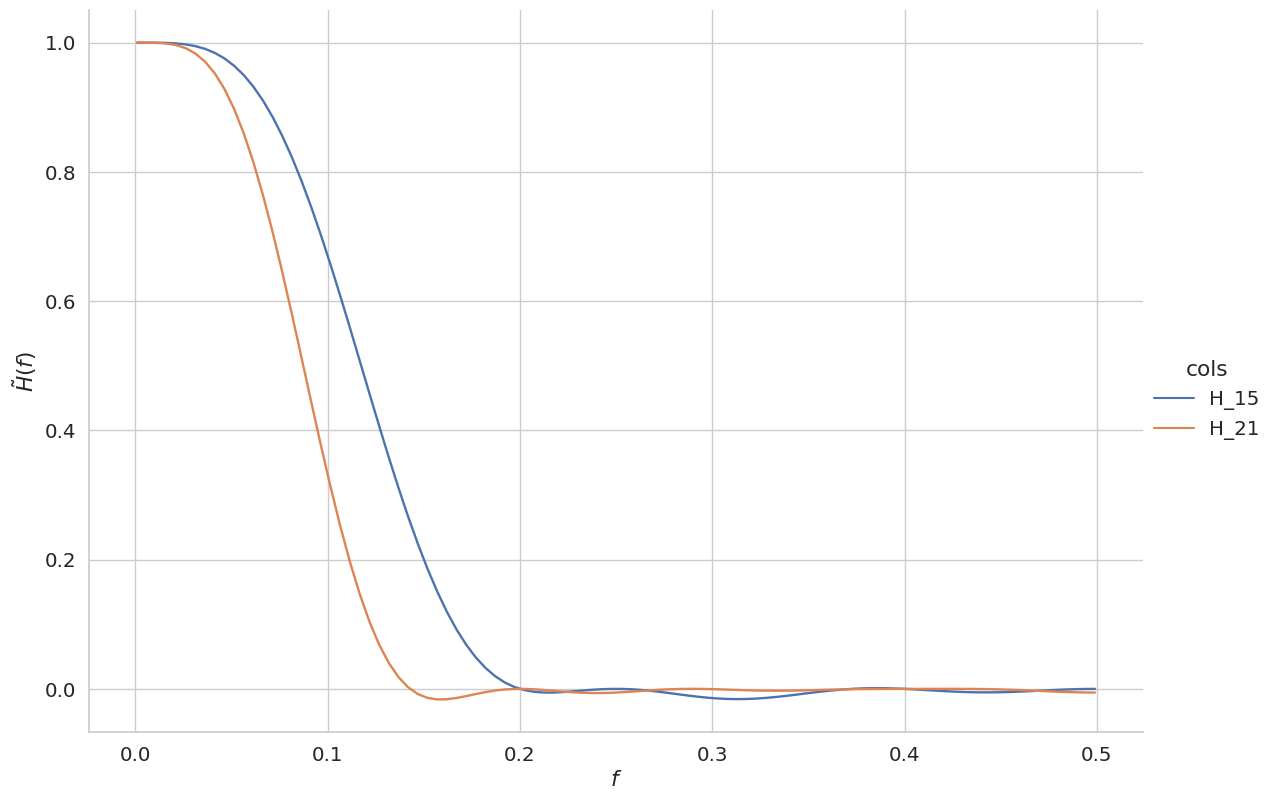

In [ ]:
H_15 = lambda x: 1/320 * (74 + 134*np.cos(2*math.pi*x) + 92*np.cos(4*math.pi*x) + 42*np.cos(6*math.pi*x) + 6*np.cos(8*math.pi*x) - 10*np.cos(10*math.pi*x) - 12*np.cos(12*math.pi*x) - 6*np.cos(14*math.pi*x))
H_21 = lambda x: 1/350 * (60 + 114*np.cos(2*math.pi*x) + 94*np.cos(4*math.pi*x) + 66*np.cos(6*math.pi*x) + 36*np.cos(8*math.pi*x) + 12*np.cos(10*math.pi*x) - 4*np.cos(12*math.pi*x) - 10*np.cos(14*math.pi*x) - 10*np.cos(16*math.pi*x) - 6*np.cos(18*math.pi*x) - 2*np.cos(20*math.pi*x))
t = np.linspace(0.001, 0.499, 100)


df = pd.DataFrame({'t': t, 'H_15': H_15(t), 'H_21': H_21(t)})
df_log = pd.DataFrame({'t': t, 'H_15': 20*np.log10(np.abs(H_15(t))), 'H_21': 20*np.log10(np.abs(H_21(t)))})


df2 = df.melt(id_vars='t', var_name='cols', value_name='vals')
df2_log4 = df_log.melt(id_vars='t', var_name='cols', value_name='vals')
sns.set_theme(style="whitegrid", palette='deep', context='notebook', font_scale=1.3)
ax = sns.relplot(data=df2, x='t', y='vals', hue='cols', linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels(r'$f$', r'$\tilde H(f)$')
plt.show()


### 5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

Кривые, построенные ранее, недостаточно информативны, так как значения на высоких частотах настолько малы, что невозможно решить, насколько они хороши. Поэтому лучше использовать логарифмы чисел $H(w)$. Для этой цели используются децибелы. Значение в Дб = $20lg(\frac{|y_n|}{|s_n|})$ Дб.

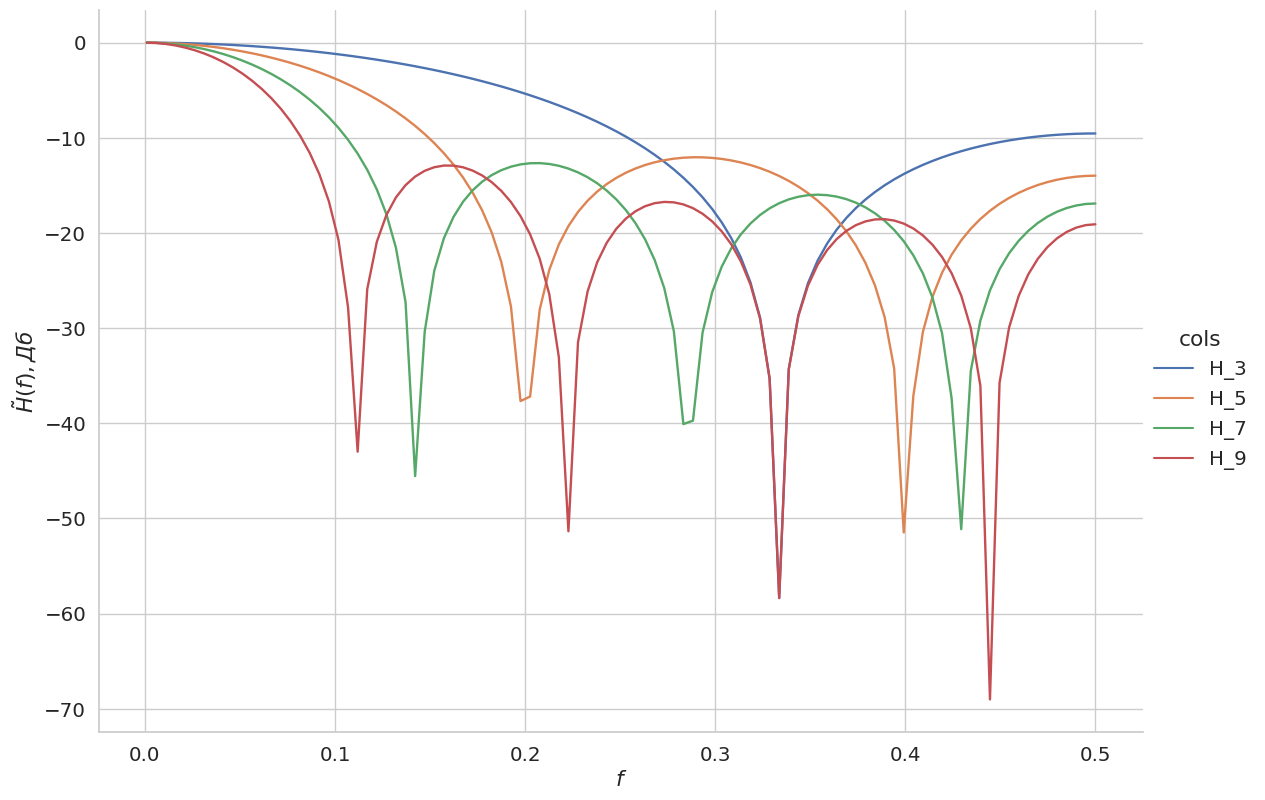

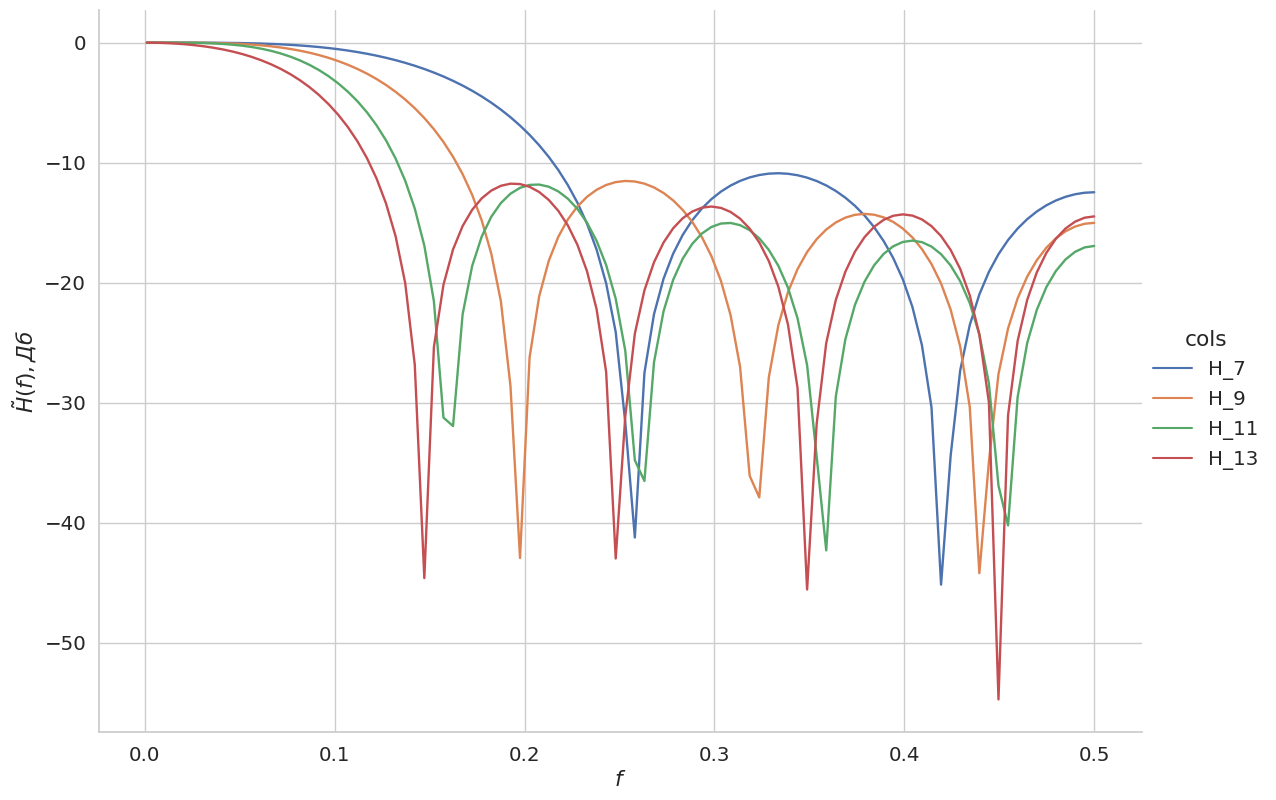

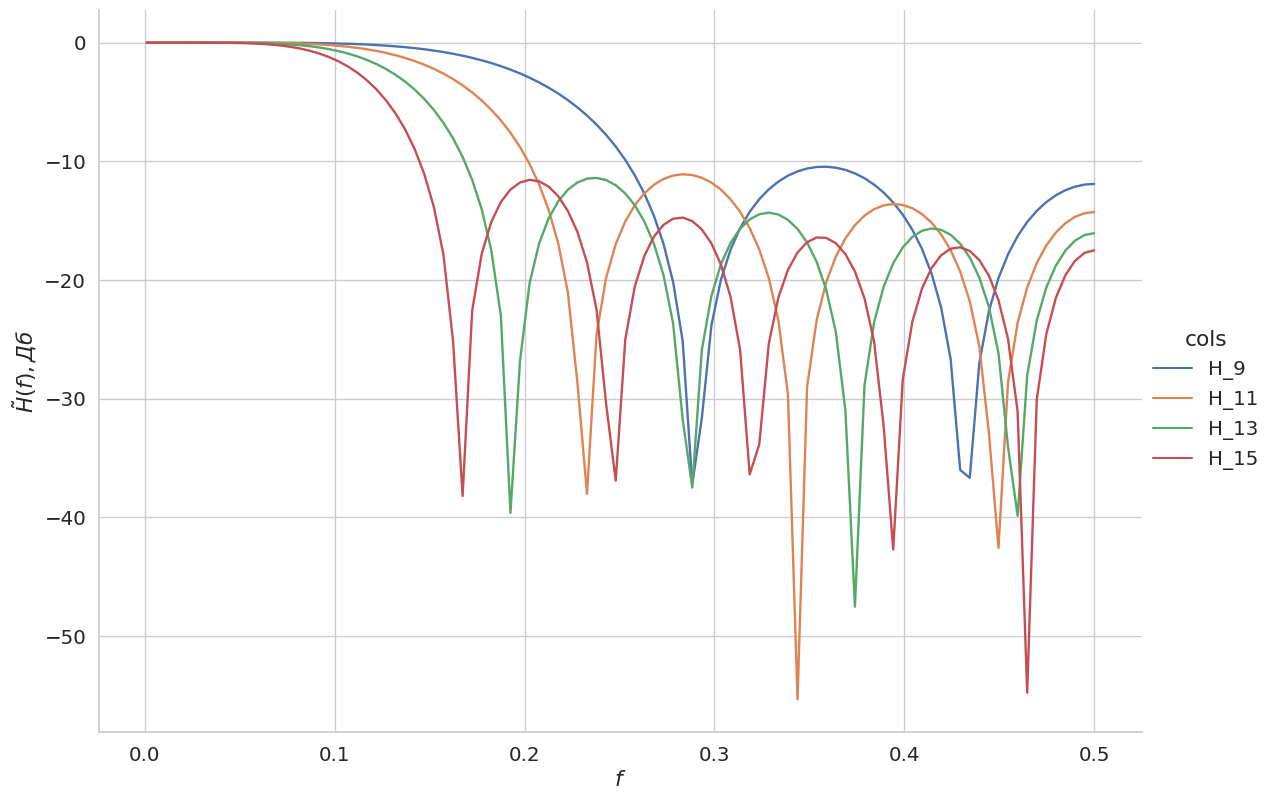

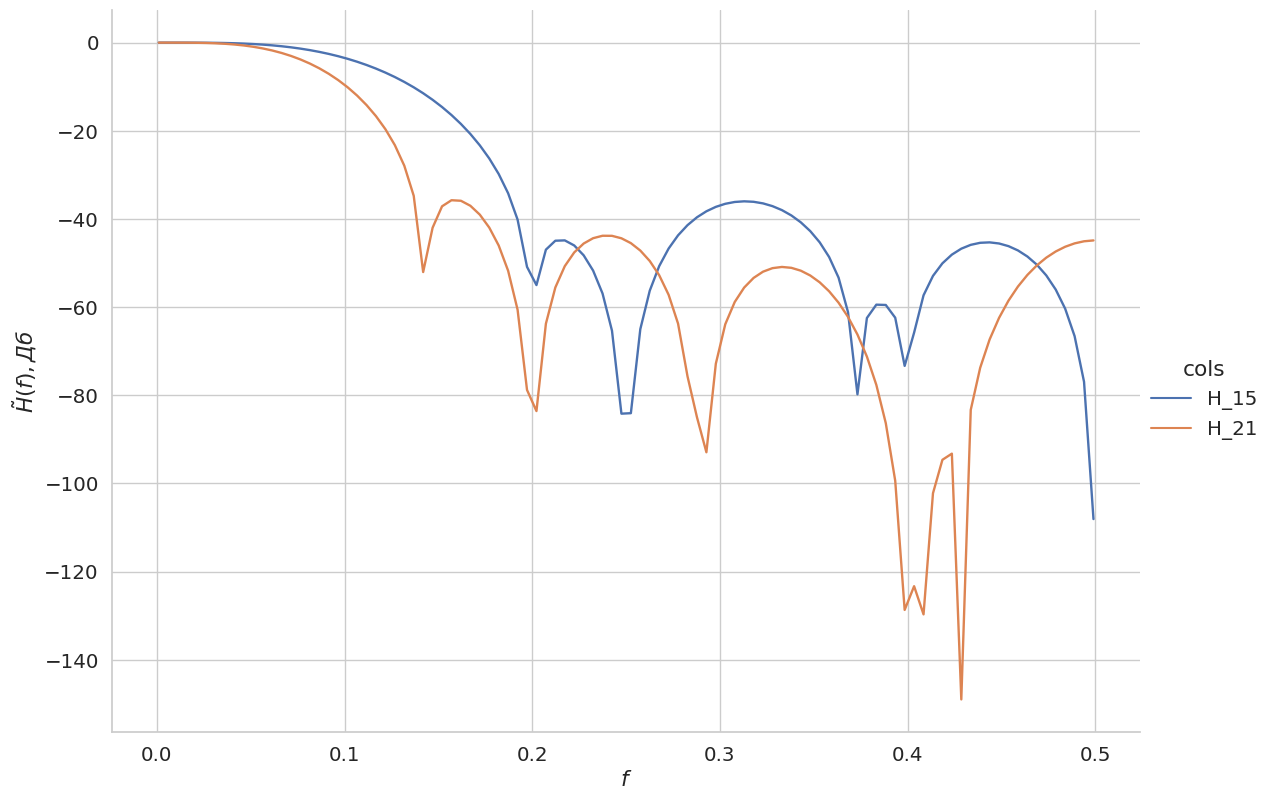

In [ ]:
ax = sns.relplot(data=df2_log1, x='t', y='vals', hue='cols', linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels(r'$f$', r'$\tilde H(f), Дб$')
plt.show()

ax = sns.relplot(data=df2_log2, x='t', y='vals', hue='cols', linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels(r'$f$', r'$\tilde H(f), Дб$')
plt.show()

ax = sns.relplot(data=df2_log3, x='t', y='vals', hue='cols', linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels(r'$f$', r'$\tilde H(f), Дб$')
plt.show()

ax = sns.relplot(data=df2_log4, x='t', y='vals', hue='cols', linewidth=1.7,
                 kind='line', height=8.27, aspect=11.7/8.27)
ax.set_axis_labels(r'$f$', r'$\tilde H(f), Дб$')
plt.show()

Из графиков выше видно, что шум является высокочастотным, а сигнал низкочастотным. Формулы сглаживания пропускают одни частоты, а другие устраняют.

### 6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

Были получены графики передаточных функций нерекурсивных фильтров, соответствующих сглаживанию прямой линией, полиномом второй степени, полиномом четвёртой степени и формулам Спенсера (п. 1-4).

Полученные графики подтверждают общее свойство всех передаточных функций – увеличение числа точек ведет к тому, что кривые спадают более быстро и величина последующих колебаний слегка уменьшается.

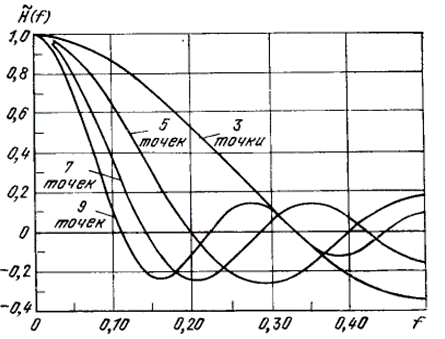
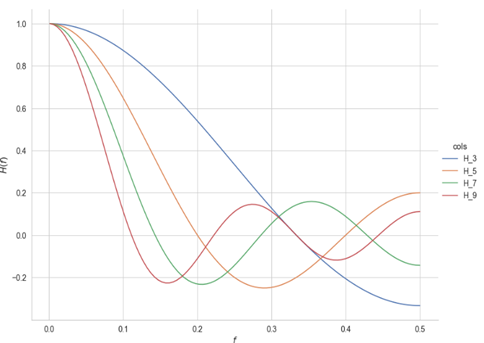  
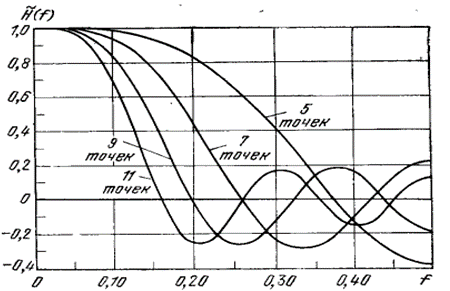
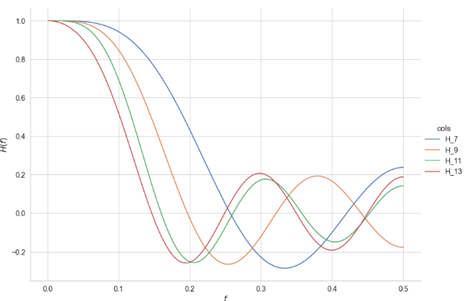  
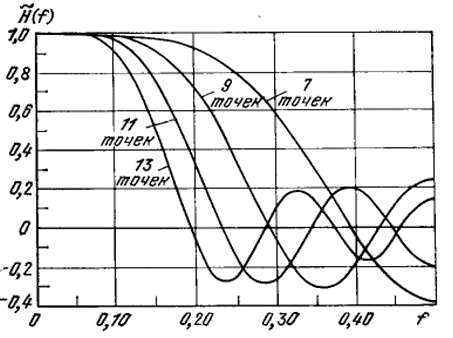
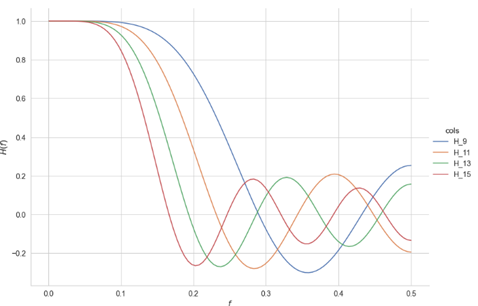  
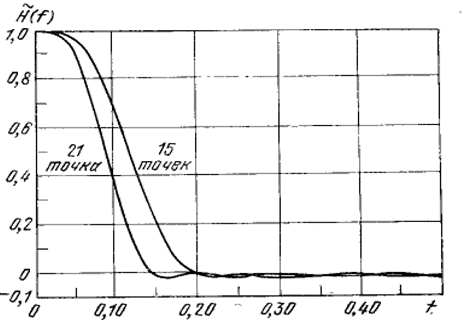
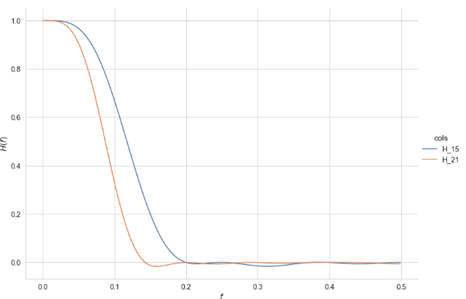

### Выводы.

В ходе выполнения лабораторной работы был проведён анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.  
Были получены формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построены графики $\tilde{H}(f)$. Были проинтерпретированы частотные свойства передаточных функций. Проведён сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.